<a href="https://colab.research.google.com/github/shahulrashid/internship_tasks/blob/main/Iris_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("/content/drive/MyDrive/internship/Iris.csv")

df = df.drop(columns=["Id"])

X = df.drop("Species", axis=1)
y = df["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [11]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

k_values = range(1, 16)
accuracies = []
conf_matrices = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    accuracies.append(acc)
    conf_matrices[k] = cm




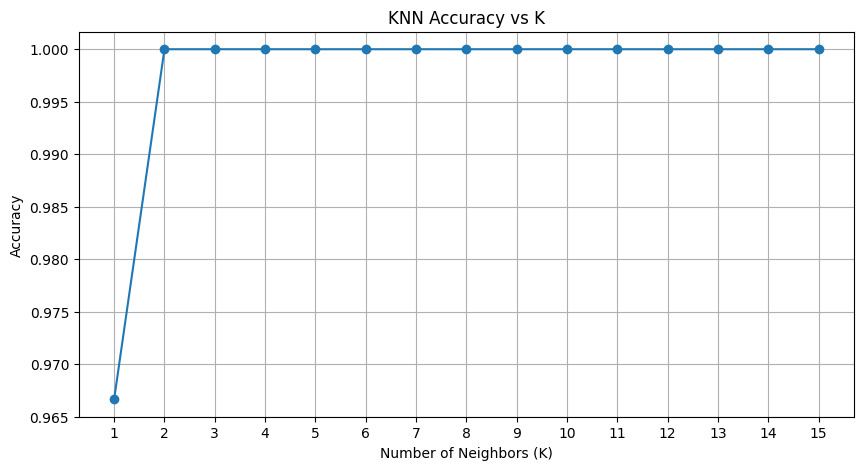

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

Best K = 2, Accuracy = 1.00


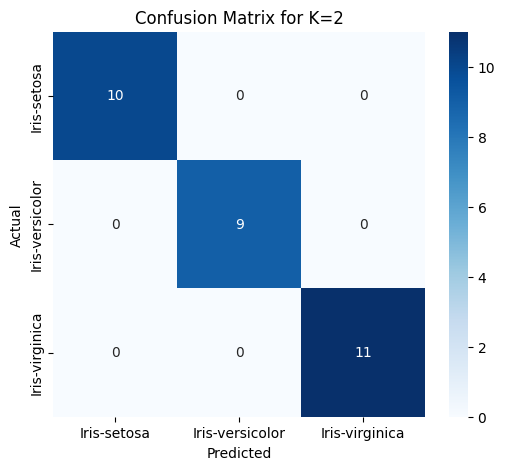

In [13]:
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K = {best_k}, Accuracy = {max(accuracies):.2f}")

best_cm = conf_matrices[best_k]
plt.figure(figsize=(6, 5))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title(f"Confusion Matrix for K={best_k}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [17]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)


In [18]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


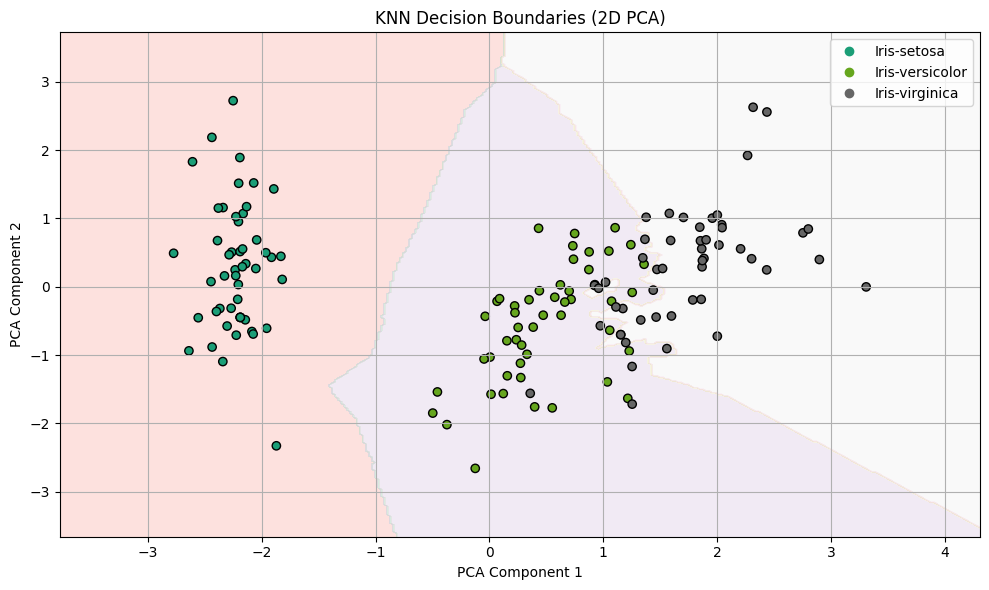

In [20]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Pastel1')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='Dark2', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KNN Decision Boundaries (2D PCA)')

handles, _ = scatter.legend_elements()
plt.legend(handles=list(handles), labels=list(le.classes_))

plt.grid(True)
plt.tight_layout()
plt.show()


1. How does the KNN algorithm work?
K-Nearest Neighbors (KNN) is a simple, instance-based supervised learning algorithm used for classification and regression. In classification, given a new data point, KNN finds the ‘K’ closest training samples (neighbors) in the feature space and assigns the most frequent class label among them to the new point. The closeness is measured using a distance metric, typically Euclidean distance. Since KNN makes predictions based on proximity in the feature space, it doesn't build a model during training — instead, it stores all training data and performs computation during prediction time.

2. How do you choose the right K?
Choosing the right value of K is crucial for model performance. A small K (like 1 or 3) can make the model overly sensitive to noise and outliers, leading to overfitting. A large K provides more smoothing but might lead to underfitting, failing to capture the local structure of the data. Typically, the optimal K is selected using techniques like cross-validation. One common heuristic is to use the square root of the number of training samples as a starting point and then tune it empirically.

3. Why is normalization important in KNN?
Normalization is essential in KNN because it relies on distance calculations between points. If features are on different scales (e.g., height in cm vs. income in thousands), those with larger ranges will dominate the distance metric, skewing the results. Normalizing or standardizing features ensures that each feature contributes equally to the distance computation, improving classification accuracy and fairness.

4. What is the time complexity of KNN?
The time complexity of KNN during prediction is
𝑂
(
𝑛
⋅
𝑑
)
O(n⋅d), where
𝑛
n is the number of training samples and
𝑑
d is the number of features. Since KNN does not have a training phase in the traditional sense, the major computational cost occurs at prediction time when the algorithm must compute the distance from the query point to all training points. This makes KNN inefficient for large datasets unless optimized with techniques like KD-Trees or Ball Trees.

5. What are pros and cons of KNN?
The primary advantages of KNN include its simplicity, ease of implementation, and no assumptions about the underlying data distribution. It's a powerful baseline for classification problems. However, its drawbacks include high prediction time for large datasets, sensitivity to irrelevant features and noise, and the requirement for proper feature scaling. Additionally, KNN does not perform well when the dataset has high dimensionality, known as the curse of dimensionality.

6. Is KNN sensitive to noise?
Yes, KNN is sensitive to noise and outliers, particularly when K is small. A single mislabeled or noisy data point can significantly affect the classification of nearby samples. Increasing K can reduce this sensitivity by averaging across more neighbors, but it also increases the risk of misclassification due to distant, unrelated points. Proper data cleaning and choosing an appropriate K are essential to mitigate this issue.

7. How does KNN handle multi-class problems?
KNN handles multi-class classification naturally. When classifying a new instance, it looks at the K nearest neighbors and performs a majority vote among their class labels, regardless of how many classes there are. The class with the highest count among the K neighbors is assigned to the test sample. There is no need for additional strategies like one-vs-rest or one-vs-one, making KNN inherently capable of handling multi-class problems.

8. What’s the role of distance metrics in KNN?
Distance metrics play a central role in KNN, as they determine how ‘closeness’ is measured between data points. Common metrics include Euclidean distance (default), Manhattan distance, and Minkowski distance. The choice of metric can significantly impact the model’s performance, especially if the feature space is skewed or non-uniform. In some cases, domain-specific distance functions or weighted distance metrics are used to capture better relationships between data points. The accuracy and interpretability of KNN heavily depend on using an appropriate distance measure for the given problem.